In [51]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [101]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [102]:
yf.pdr_override()
df = pdr.get_data_yahoo("ETH-USD", start="2016-01-01", end="2023-04-05")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [103]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [104]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,1793.620117,1844.677368,1783.142212,1822.022095,1822.022095,9149379763
2023-04-01,1821.704346,1840.173096,1811.118530,1813.860596,1813.860596,5556443606
2023-04-02,1821.192139,1824.328857,1774.872437,1795.708130,1795.708130,6199721188
2023-04-03,1794.922485,1839.157837,1765.518921,1810.297119,1810.297119,9643826401
2023-04-04,1810.142090,1886.594604,1802.955444,1871.005127,1871.005127,10398322335


In [105]:
df.shape

(1973, 6)

In [106]:
df1=df.reset_index()['Open']

In [107]:
df1

0        308.644989
1        320.670990
2        298.585999
3        314.690002
4        307.024994
           ...     
1968    1793.620117
1969    1821.704346
1970    1821.192139
1971    1794.922485
1972    1810.142090
Name: Open, Length: 1973, dtype: float64

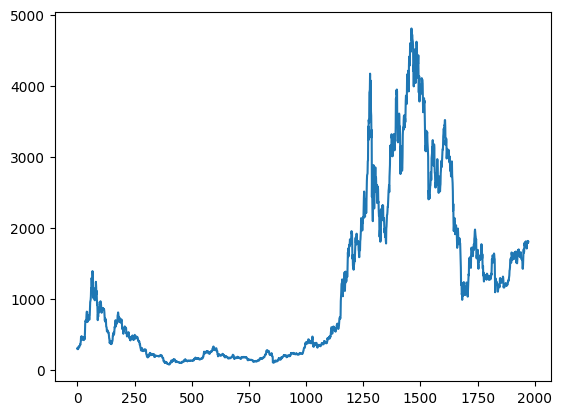

In [108]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [109]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [110]:
import numpy as np

In [111]:
df1

0        308.644989
1        320.670990
2        298.585999
3        314.690002
4        307.024994
           ...     
1968    1793.620117
1969    1821.704346
1970    1821.192139
1971    1794.922485
1972    1810.142090
Name: Open, Length: 1973, dtype: float64

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [113]:
df1

array([[0.04747676],
       [0.05002152],
       [0.04534823],
       ...,
       [0.36753894],
       [0.36198016],
       [0.3652007 ]])

In [114]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [115]:
training_size,test_size

(1282, 691)

In [116]:
train_data

array([[0.04747676],
       [0.05002152],
       [0.04534823],
       ...,
       [0.81763916],
       [0.86553881],
       [0.79238339]])

In [117]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [118]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [119]:
print(X_train.shape), print(y_train.shape)

(1181, 100)
(1181,)


(None, None)

In [120]:
print(X_test.shape), print(ytest.shape)

(590, 100)
(590,)


(None, None)

In [121]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [122]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [123]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 33s 786ms/step - loss: 0.0039 - val_loss: 0.0084
Epoch 2/100
19/19 [==============================] - 10s 512ms/step - loss: 6.7895e-04 - val_loss: 0.0155
Epoch 3/100
19/19 [==============================] - 8s 411ms/step - loss: 5.2739e-04 - val_loss: 0.0555
Epoch 4/100
19/19 [==============================] - 9s 470ms/step - loss: 4.9463e-04 - val_loss: 0.0343
Epoch 5/100
19/19 [==============================] - 7s 384ms/step - loss: 4.2906e-04 - val_loss: 0.0267
Epoch 6/100
19/19 [==============================] - 8s 439ms/step - loss: 3.9603e-04 - val_loss: 0.0259
Epoch 7/100
19/19 [==============================] - 8s 399ms/step - loss: 3.9593e-04 - val_loss: 0.0574
Epoch 8/100
19/19 [==============================] - 8s 441ms/step - loss: 3.6426e-04 - val_loss: 0.0440
Epoch 9/100
19/19 [==============================] - 7s 376ms/step - loss: 3.5553e-04 - val_loss: 0.0226
Epoch 10/100
19/19 [==============================] - 8s 

In [127]:
import tensorflow as tf

In [128]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 1s 39ms/step


In [129]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [130]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

750.6476404304331

In [131]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2757.1881610298765

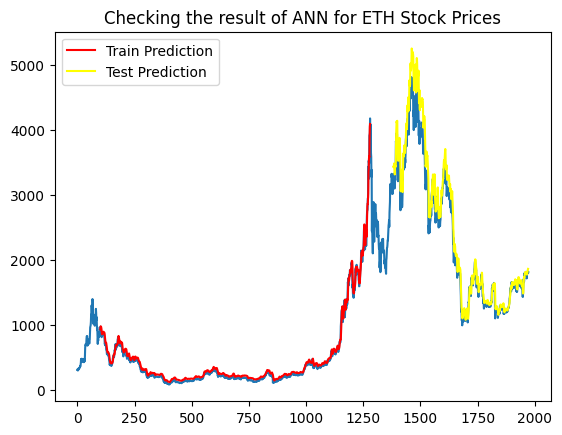

In [132]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for ETH Stock Prices")
plt.show()

In [133]:
len(test_data)

691

In [134]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 350)

In [135]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [136]:
temp_input

[0.6389734511127877,
 0.6334493579818697,
 0.6142164690226238,
 0.6095322856086438,
 0.6037226603701162,
 0.6006846648716382,
 0.618873375260411,
 0.576488879684851,
 0.5934603977473366,
 0.6036019278686718,
 0.5779462971423819,
 0.559845772624369,
 0.5805026025067272,
 0.5867530537764168,
 0.5710898069448168,
 0.6043319539610602,
 0.5638530377814269,
 0.5524391410455963,
 0.539981943981708,
 0.5150943620782571,
 0.4567215149934804,
 0.4779039471307365,
 0.42071786385562276,
 0.39693728068599826,
 0.40839738847126916,
 0.41726414972679654,
 0.436235322446283,
 0.4102175458769783,
 0.4245172955281659,
 0.3876323797878733,
 0.40918444865933357,
 0.39712674857176955,
 0.4000157269968987,
 0.4143358828689124,
 0.3995333136043063,
 0.40086348923425585,
 0.39374432706253826,
 0.36359287008969093,
 0.3471072008974811,
 0.36140077702110235,
 0.36556971627455326,
 0.4046154699857135,
 0.3931131807338489,
 0.3677970940237095,
 0.37027771555638345,
 0.3578111936244973,
 0.36343948763492473,
 0.36

In [137]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=349
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.63344936 0.61421647 0.60953229 0.60372266 0.60068466 0.61887338
 0.57648888 0.5934604  0.60360193 0.5779463  0.55984577 0.5805026
 0.58675305 0.57108981 0.60433195 0.56385304 0.55243914 0.53998194
 0.51509436 0.45672151 0.47790395 0.42071786 0.39693728 0.40839739
 0.41726415 0.43623532 0.41021755 0.4245173  0.38763238 0.40918445
 0.39712675 0.40001573 0.41433588 0.39953331 0.40086349 0.39374433
 0.36359287 0.3471072  0.36140078 0.36556972 0.40461547 0.39311318
 0.36779709 0.37027772 0.35781119 0.36343949 0.36424719 0.37560989
 0.36603836 0.36168187 0.36087293 0.33453405 0.30596144 0.28768847
 0.23705565 0.23849682 0.24320239 0.20815729 0.21204876 0.19237432
 0.22078345 0.22075289 0.22030028 0.20463231 0.22407358 0.24174681
 0.2451881  0.23603103 0.23466425 0.22435283 0.21479438 0.20822693
 0.20649271 0.2078356  0.209386   0.22561936 0.22229981 0.2333326
 0.2440439  0.24081197 0.23966878 0.2293498  0.21435128 0.20185125
 0.21779125 0.23433008 0.24303059 0.26851065 0.26546

2 day output [[0.3819765]]
3 day input [0.60372266 0.60068466 0.61887338 0.57648888 0.5934604  0.60360193
 0.5779463  0.55984577 0.5805026  0.58675305 0.57108981 0.60433195
 0.56385304 0.55243914 0.53998194 0.51509436 0.45672151 0.47790395
 0.42071786 0.39693728 0.40839739 0.41726415 0.43623532 0.41021755
 0.4245173  0.38763238 0.40918445 0.39712675 0.40001573 0.41433588
 0.39953331 0.40086349 0.39374433 0.36359287 0.3471072  0.36140078
 0.36556972 0.40461547 0.39311318 0.36779709 0.37027772 0.35781119
 0.36343949 0.36424719 0.37560989 0.36603836 0.36168187 0.36087293
 0.33453405 0.30596144 0.28768847 0.23705565 0.23849682 0.24320239
 0.20815729 0.21204876 0.19237432 0.22078345 0.22075289 0.22030028
 0.20463231 0.22407358 0.24174681 0.2451881  0.23603103 0.23466425
 0.22435283 0.21479438 0.20822693 0.20649271 0.2078356  0.209386
 0.22561936 0.22229981 0.2333326  0.2440439  0.24081197 0.23966878
 0.2293498  0.21435128 0.20185125 0.21779125 0.23433008 0.24303059
 0.26851065 0.26546375 0.

6 day output [[0.4062616]]
7 day input [0.5934604  0.60360193 0.5779463  0.55984577 0.5805026  0.58675305
 0.57108981 0.60433195 0.56385304 0.55243914 0.53998194 0.51509436
 0.45672151 0.47790395 0.42071786 0.39693728 0.40839739 0.41726415
 0.43623532 0.41021755 0.4245173  0.38763238 0.40918445 0.39712675
 0.40001573 0.41433588 0.39953331 0.40086349 0.39374433 0.36359287
 0.3471072  0.36140078 0.36556972 0.40461547 0.39311318 0.36779709
 0.37027772 0.35781119 0.36343949 0.36424719 0.37560989 0.36603836
 0.36168187 0.36087293 0.33453405 0.30596144 0.28768847 0.23705565
 0.23849682 0.24320239 0.20815729 0.21204876 0.19237432 0.22078345
 0.22075289 0.22030028 0.20463231 0.22407358 0.24174681 0.2451881
 0.23603103 0.23466425 0.22435283 0.21479438 0.20822693 0.20649271
 0.2078356  0.209386   0.22561936 0.22229981 0.2333326  0.2440439
 0.24081197 0.23966878 0.2293498  0.21435128 0.20185125 0.21779125
 0.23433008 0.24303059 0.26851065 0.26546375 0.31615957 0.3086625
 0.3038845  0.31581284 0.3

10 day output [[0.43061757]]
11 day input [0.5805026  0.58675305 0.57108981 0.60433195 0.56385304 0.55243914
 0.53998194 0.51509436 0.45672151 0.47790395 0.42071786 0.39693728
 0.40839739 0.41726415 0.43623532 0.41021755 0.4245173  0.38763238
 0.40918445 0.39712675 0.40001573 0.41433588 0.39953331 0.40086349
 0.39374433 0.36359287 0.3471072  0.36140078 0.36556972 0.40461547
 0.39311318 0.36779709 0.37027772 0.35781119 0.36343949 0.36424719
 0.37560989 0.36603836 0.36168187 0.36087293 0.33453405 0.30596144
 0.28768847 0.23705565 0.23849682 0.24320239 0.20815729 0.21204876
 0.19237432 0.22078345 0.22075289 0.22030028 0.20463231 0.22407358
 0.24174681 0.2451881  0.23603103 0.23466425 0.22435283 0.21479438
 0.20822693 0.20649271 0.2078356  0.209386   0.22561936 0.22229981
 0.2333326  0.2440439  0.24081197 0.23966878 0.2293498  0.21435128
 0.20185125 0.21779125 0.23433008 0.24303059 0.26851065 0.26546375
 0.31615957 0.3086625  0.3038845  0.31581284 0.30728772 0.30998888
 0.3205553  0.287966

14 day output [[0.45590898]]
15 day input [0.56385304 0.55243914 0.53998194 0.51509436 0.45672151 0.47790395
 0.42071786 0.39693728 0.40839739 0.41726415 0.43623532 0.41021755
 0.4245173  0.38763238 0.40918445 0.39712675 0.40001573 0.41433588
 0.39953331 0.40086349 0.39374433 0.36359287 0.3471072  0.36140078
 0.36556972 0.40461547 0.39311318 0.36779709 0.37027772 0.35781119
 0.36343949 0.36424719 0.37560989 0.36603836 0.36168187 0.36087293
 0.33453405 0.30596144 0.28768847 0.23705565 0.23849682 0.24320239
 0.20815729 0.21204876 0.19237432 0.22078345 0.22075289 0.22030028
 0.20463231 0.22407358 0.24174681 0.2451881  0.23603103 0.23466425
 0.22435283 0.21479438 0.20822693 0.20649271 0.2078356  0.209386
 0.22561936 0.22229981 0.2333326  0.2440439  0.24081197 0.23966878
 0.2293498  0.21435128 0.20185125 0.21779125 0.23433008 0.24303059
 0.26851065 0.26546375 0.31615957 0.3086625  0.3038845  0.31581284
 0.30728772 0.30998888 0.3205553  0.28796687 0.28766548 0.32840048
 0.34731625 0.34762053

18 day output [[0.4844744]]
19 day input [0.45672151 0.47790395 0.42071786 0.39693728 0.40839739 0.41726415
 0.43623532 0.41021755 0.4245173  0.38763238 0.40918445 0.39712675
 0.40001573 0.41433588 0.39953331 0.40086349 0.39374433 0.36359287
 0.3471072  0.36140078 0.36556972 0.40461547 0.39311318 0.36779709
 0.37027772 0.35781119 0.36343949 0.36424719 0.37560989 0.36603836
 0.36168187 0.36087293 0.33453405 0.30596144 0.28768847 0.23705565
 0.23849682 0.24320239 0.20815729 0.21204876 0.19237432 0.22078345
 0.22075289 0.22030028 0.20463231 0.22407358 0.24174681 0.2451881
 0.23603103 0.23466425 0.22435283 0.21479438 0.20822693 0.20649271
 0.2078356  0.209386   0.22561936 0.22229981 0.2333326  0.2440439
 0.24081197 0.23966878 0.2293498  0.21435128 0.20185125 0.21779125
 0.23433008 0.24303059 0.26851065 0.26546375 0.31615957 0.3086625
 0.3038845  0.31581284 0.30728772 0.30998888 0.3205553  0.28796687
 0.28766548 0.32840048 0.34731625 0.34762053 0.34102331 0.3379679
 0.32806486 0.32772744 0.

22 day output [[0.51792735]]
23 day input [0.40839739 0.41726415 0.43623532 0.41021755 0.4245173  0.38763238
 0.40918445 0.39712675 0.40001573 0.41433588 0.39953331 0.40086349
 0.39374433 0.36359287 0.3471072  0.36140078 0.36556972 0.40461547
 0.39311318 0.36779709 0.37027772 0.35781119 0.36343949 0.36424719
 0.37560989 0.36603836 0.36168187 0.36087293 0.33453405 0.30596144
 0.28768847 0.23705565 0.23849682 0.24320239 0.20815729 0.21204876
 0.19237432 0.22078345 0.22075289 0.22030028 0.20463231 0.22407358
 0.24174681 0.2451881  0.23603103 0.23466425 0.22435283 0.21479438
 0.20822693 0.20649271 0.2078356  0.209386   0.22561936 0.22229981
 0.2333326  0.2440439  0.24081197 0.23966878 0.2293498  0.21435128
 0.20185125 0.21779125 0.23433008 0.24303059 0.26851065 0.26546375
 0.31615957 0.3086625  0.3038845  0.31581284 0.30728772 0.30998888
 0.3205553  0.28796687 0.28766548 0.32840048 0.34731625 0.34762053
 0.34102331 0.3379679  0.32806486 0.32772744 0.32473015 0.32232573
 0.34880536 0.340154

26 day output [[0.5577182]]
27 day input [0.4245173  0.38763238 0.40918445 0.39712675 0.40001573 0.41433588
 0.39953331 0.40086349 0.39374433 0.36359287 0.3471072  0.36140078
 0.36556972 0.40461547 0.39311318 0.36779709 0.37027772 0.35781119
 0.36343949 0.36424719 0.37560989 0.36603836 0.36168187 0.36087293
 0.33453405 0.30596144 0.28768847 0.23705565 0.23849682 0.24320239
 0.20815729 0.21204876 0.19237432 0.22078345 0.22075289 0.22030028
 0.20463231 0.22407358 0.24174681 0.2451881  0.23603103 0.23466425
 0.22435283 0.21479438 0.20822693 0.20649271 0.2078356  0.209386
 0.22561936 0.22229981 0.2333326  0.2440439  0.24081197 0.23966878
 0.2293498  0.21435128 0.20185125 0.21779125 0.23433008 0.24303059
 0.26851065 0.26546375 0.31615957 0.3086625  0.3038845  0.31581284
 0.30728772 0.30998888 0.3205553  0.28796687 0.28766548 0.32840048
 0.34731625 0.34762053 0.34102331 0.3379679  0.32806486 0.32772744
 0.32473015 0.32232573 0.34880536 0.34015428 0.34182925 0.35799116
 0.34250914 0.37402171 

29 day output [[0.5928931]]
[[0.3726631999015808], [0.3765566647052765], [0.38197648525238037], [0.3878644108772278], [0.3939465582370758], [0.40010324120521545], [0.4062615931034088], [0.41238588094711304], [0.41847142577171326], [0.4245375394821167], [0.4306175708770752], [0.4367527961730957], [0.44298622012138367], [0.44935905933380127], [0.45590898394584656], [0.46266865730285645], [0.4696667790412903], [0.47692790627479553], [0.48447439074516296], [0.492326945066452], [0.5005058646202087], [0.5090319514274597], [0.517927348613739], [0.5272158980369568], [0.536923885345459], [0.5470806360244751], [0.5577182173728943], [0.5688722729682922], [0.5805824398994446], [0.592893123626709]]


In [138]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [139]:
import matplotlib.pyplot as plt

In [140]:
len(df1)

1973

In [141]:
 scaler.inverse_transform(lst_output)

array([[1845.40831164],
       [1863.80801488],
       [1889.42095727],
       [1917.2460667 ],
       [1945.98902758],
       [1975.08422821],
       [2004.18731585],
       [2033.12942387],
       [2061.88844046],
       [2090.55562964],
       [2119.28859091],
       [2148.28238705],
       [2177.74024956],
       [2207.85695955],
       [2238.81053823],
       [2270.75534577],
       [2303.82701066],
       [2338.14158472],
       [2373.8046976 ],
       [2410.91423282],
       [2449.5661021 ],
       [2489.85861148],
       [2531.89640474],
       [2575.79215354],
       [2621.67007837],
       [2669.66876537],
       [2719.9397579 ],
       [2772.65150009],
       [2827.99130855],
       [2886.16903424]])

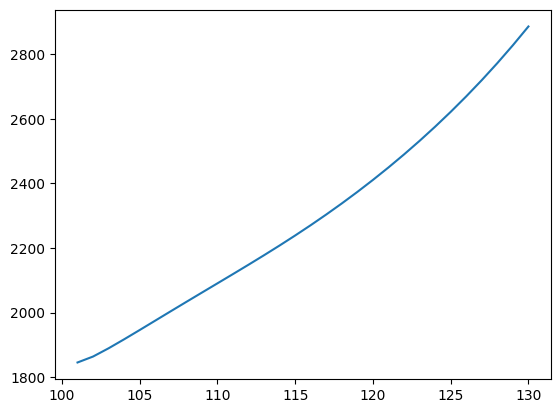

In [142]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [143]:
df1

array([[0.04747676],
       [0.05002152],
       [0.04534823],
       ...,
       [0.36753894],
       [0.36198016],
       [0.3652007 ]])

In [144]:
scaler.inverse_transform(lst_output)

array([[1845.40831164],
       [1863.80801488],
       [1889.42095727],
       [1917.2460667 ],
       [1945.98902758],
       [1975.08422821],
       [2004.18731585],
       [2033.12942387],
       [2061.88844046],
       [2090.55562964],
       [2119.28859091],
       [2148.28238705],
       [2177.74024956],
       [2207.85695955],
       [2238.81053823],
       [2270.75534577],
       [2303.82701066],
       [2338.14158472],
       [2373.8046976 ],
       [2410.91423282],
       [2449.5661021 ],
       [2489.85861148],
       [2531.89640474],
       [2575.79215354],
       [2621.67007837],
       [2669.66876537],
       [2719.9397579 ],
       [2772.65150009],
       [2827.99130855],
       [2886.16903424]])

In [145]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

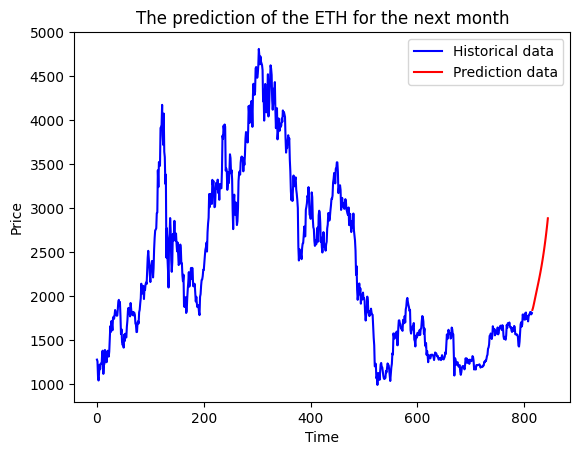

In [146]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("The prediction of the ETH for the next month")

# show the plot
plt.show()